In [201]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (1).csv


**REQUIRED** **LIBRYERS**

In [202]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Data Preprocessing 

In [217]:
Company_data = pd.read_csv("Company_Data.csv")

In [218]:
Company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [219]:
Company_data.shape

(400, 11)

In [220]:
Company_data.head

<bound method NDFrame.head of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Educ

In [221]:
Company_data.info()            # list of the variable names with the data type it is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [224]:
Company_data.isnull().sum()    # finding missing values are their are not 


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [225]:
list(Company_data)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

**DATA TRANSFORMATION**

Transforming from Categorical data to Numerical data

In [226]:
from sklearn import preprocessing 
lable_encoder = preprocessing.LabelEncoder()
Company_data["ShelveLoc"]=lable_encoder.fit_transform(Company_data["ShelveLoc"])
Company_data["Urban"]=lable_encoder.fit_transform(Company_data["Urban"])
Company_data["US"]=lable_encoder.fit_transform(Company_data["US"])

In [228]:
Company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [229]:
Company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [230]:
Company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


Transforming from Numerical data to Categorical data


In [231]:
Company_data["Sales"].max()

16.27

In [232]:
Company_data["Sales"].min()

0.0

In [233]:
Company_data["Sales"].mean()

7.496325000000001

In [234]:
def fun1(text):
    if text > 7.49:
        return"High"
    else:
        return"low"

In [235]:
Company_data["Sales_new"]=Company_data["Sales"].apply(fun1)   

In [237]:
Company_data["Sales_new"]        

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales_new, Length: 400, dtype: object

In [239]:
Company_data["Sales_new"].value_counts()   # It counts the number high and low 

low     201
High    199
Name: Sales_new, dtype: int64

**EXPLORATION DATA ANALYSIS**

**Scatter plot between the variables along with histograms
 **

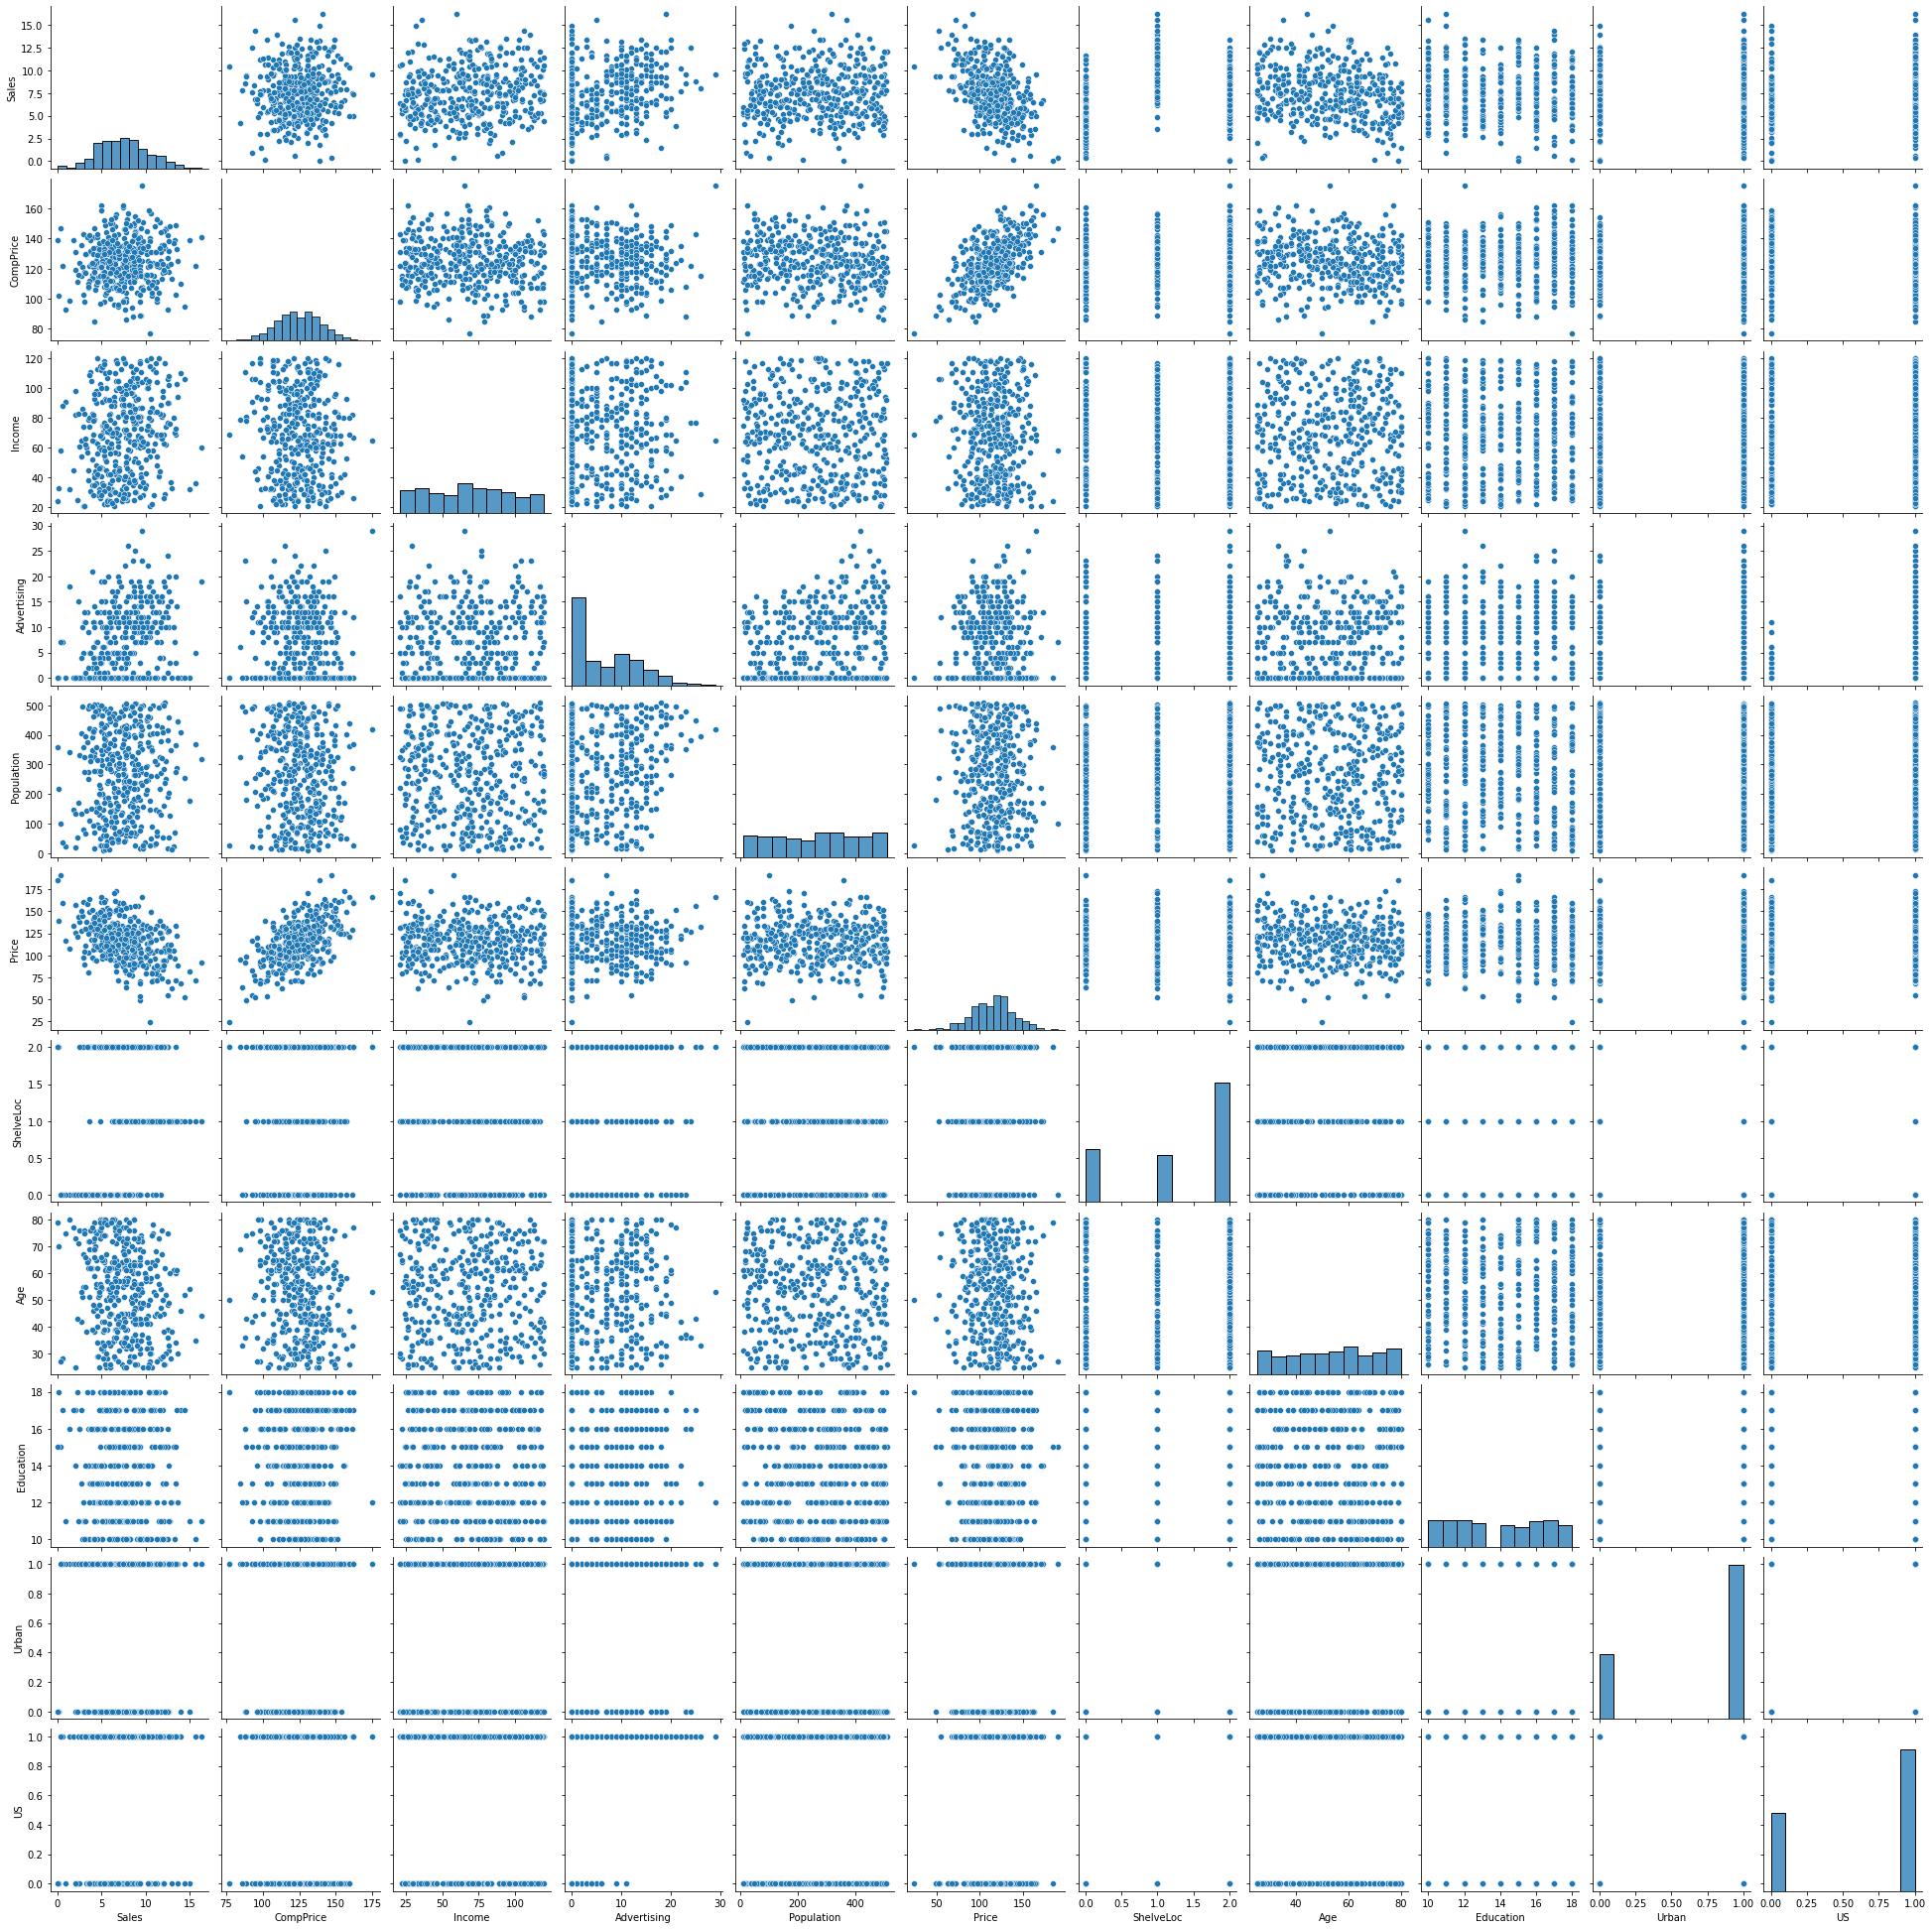

In [243]:
import seaborn as sns
sns.pairplot(Company_data)

SPLITTING THE DATE 

In [245]:
X = Company_data.iloc[:,1:11]
X.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
dtypes: int64(10)
memory usage: 31.4 KB


In [246]:
list(X)

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [247]:
Y=Company_data["Sales_new"]
Y

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales_new, Length: 400, dtype: object

**DATA PARTIATION**

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=20)

**RANDOM FOREST CLASSIFIER**

In [249]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=0.6, 
                        n_estimators=500)

In [250]:
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test) 
metrics.accuracy_score(Y_test,Y_pred).round(2)

0.81

In [251]:
Y_pred_train=RF.predict(X_train)
Y_pred_test=RF.predict(X_test)

**CONFUSION MATRIX**

In [252]:
from sklearn import metrics

In [253]:
#TRAIN & TEST ACCURACY SCORES
print("Traning Accuracy:",metrics.accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy:",metrics.accuracy_score(Y_test,Y_pred_test).round(2))

Traning Accuracy: 1.0
Test Accuracy: 0.81


In [179]:
# By applying the Randomforest classifier we could see that 81% accuracy with 60%
# of variables only used.

In [254]:
Traning_Accuracy=[]
Test_Accuracy=[]

In [255]:
for i in range(1,23):
    classifier = DecisionTreeClassifier(max_depth=i) 
    classifier.fit(X_train, Y_train)
    Y_pred_train = classifier.predict(X_train) 
    Y_pred_test = classifier.predict(X_test) 
    Traning_Accuracy.append(metrics.accuracy_score(Y_train, Y_pred_train).round(2))
    Test_Accuracy.append(metrics.accuracy_score(Y_test, Y_pred_test).round(2))

In [256]:
print(Traning_Accuracy)
print(Test_Accuracy)

[0.65, 0.65, 0.76, 0.83, 0.86, 0.91, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.66, 0.66, 0.68, 0.72, 0.75, 0.69, 0.73, 0.7, 0.71, 0.69, 0.71, 0.7, 0.7, 0.66, 0.72, 0.73, 0.69, 0.69, 0.69, 0.69, 0.7, 0.7]


In [257]:
# Above single decsion tree accuracies will not be stable for all the time
# So i implemented other models like bagging classifier and random forest classifier 
# to see stability of the performances and accuracyes scores that which model is giving
# the best accuracyes too be observe

**BAGGING CLASSIFIER**

In [184]:
from sklearn.ensemble import BaggingClassifier

In [258]:
classifier=DecisionTreeClassifier(criterion="gini",max_depth=6)

In [259]:
# classifier=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [260]:
bag=BaggingClassifier(base_estimator=classifier,
                      max_features=0.9,
                      max_samples=0.6,n_estimators=500)

In [267]:
bag.fit(X_train,Y_train)
Y_pred=bag.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred).round(2)

0.83

In [189]:
# bagging with gini method we could see that same 83% accuracy as consistent
# bagging with entropy method we could see that 83% accuracy as consistent

**CONCLUSION**

In [73]:
# By applying all the above methods we found that minimum complexity (60%) of Random forests,
# we are getting as 81% accuracy score as the best 